In [1]:
import re
import string
import numpy as np
from sklearn import linear_model
from sklearn.metrics import confusion_matrix

#### (a) Parse each file with the specifications in readme.txt. Are the labels balanced? If not, what’s the ratio between
#### the two labels? Explain how you process these files.

In [2]:
#Parsing data and Observing Labels.
file_amazon=open("amazon_cells_labelled.txt","r")
file_yelp=open("yelp_labelled.txt","r")
file_imdb=open("imdb_labelled.txt","r")

lines_amazon = [line_amazon.rstrip("\n") for line_amazon in file_amazon]
lines_yelp=[line_yelp.rstrip("\n") for line_yelp in file_yelp]
lines_imdb=[line_imdb.rstrip("\n") for line_imdb in file_imdb]

In [3]:
X_amazon= [i.split('\t', 1)[0] for i in lines_amazon]
Y_amazon= [i.split('\t', 1)[1] for i in lines_amazon]
X_yelp= [i.split('\t', 1)[0] for i in lines_yelp]
Y_yelp= [i.split('\t', 1)[1] for i in lines_yelp]
X_imdb= [i.split('\t', 1)[0] for i in lines_imdb]
Y_imdb= [i.split('\t', 1)[1] for i in lines_imdb]

In [4]:
print("Amazon \t Label 0 count-"+str(Y_amazon.count('0'))+"\tLabel 1 count-"+str(Y_amazon.count('1')))
print("Yelp \t Label 0 count-"+str(Y_yelp.count('0'))+"\tLabel 1 count-"+str(Y_yelp.count('1')))
print("Imdb \t Label 0 count-"+str(Y_imdb.count('0'))+"\tLabel 1 count-"+str(Y_imdb.count('1')))

Amazon 	 Label 0 count-500	Label 1 count-500
Yelp 	 Label 0 count-500	Label 1 count-500
Imdb 	 Label 0 count-500	Label 1 count-500


#### (b) Pick your preprocessing strategy.

In [5]:
# Preprocessing - convert all sentence to lowercase
def lowercase_process(x):
    for i in range(len(x)):
        x[i]=x[i].lower()
    return x

In [6]:
# Now all words are lower-case
X_amazon=lowercase_process(X_amazon)
X_yelp=lowercase_process(X_yelp)
X_imdb=lowercase_process(X_imdb)

In [7]:
# Preprocessing - punctuations
def punctuation_process(x):
    translator = str.maketrans({key: None for key in string.punctuation})
    for i in range(len(x)):
        x[i]=x[i].translate(translator)
    return x

In [8]:
#Remove all punctuations
X_amazon=punctuation_process(X_amazon)
X_yelp=punctuation_process(X_yelp)
X_imdb=punctuation_process(X_imdb)

In [9]:
# Preprocessing - stop words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stop = stopwords.words('english')

def stopwords_process(x):
    for i in range(len(x)):
        word_list = x[i].split(" ")
        filtered_words = []
        for word in word_list:
            if word not in stop_words:
                filtered_words.append(word)
        x[i]=" ".join(filtered_words)
    return x

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
X_amazon=stopwords_process(X_amazon)
X_yelp=stopwords_process(X_yelp)
X_imdb=stopwords_process(X_imdb)

In [11]:
#Stemming
from nltk.stem.snowball import SnowballStemmer

def word_stemmer(x):
    stemmer = SnowballStemmer("english")
    for i in range(len(x)):
        x[i]=stemmer.stem(x[i])
    return x

In [12]:
X_amazon = word_stemmer(X_amazon)
X_yelp = word_stemmer(X_yelp)
X_imdb = word_stemmer(X_imdb)

In [13]:
# Preprocessing - Lemmatization of all the words
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
def word_lemmatizer_process(X):
    wordnet_lemmatizer = WordNetLemmatizer()
    for i in range(len(X)):
        X[i]=wordnet_lemmatizer.lemmatize(X[i])
    return X
X_amazon = word_lemmatizer_process(X_amazon)
X_yelp = word_lemmatizer_process(X_yelp)
X_imdb = word_lemmatizer_process(X_imdb)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Chi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
Y_amazon_np = np.array(Y_amazon)
Y_yelp_np = np.array(Y_yelp)
Y_imdb_np = np.array(Y_imdb)

X_amazon_np = np.array(X_amazon)
X_yelp_np = np.array(X_yelp)
X_imdb_np = np.array(X_imdb)

In [15]:
X_amazon_np

array(['way plug us unless go convert', 'good case excellent valu',
       'great jawbon',
       'tied charger conversations lasting 45 minutesmajor problem',
       'mic great', 'jiggle plug get line right get decent volum',
       'several dozen several hundred contacts imagine fun sending one on',
       'razr owneryou must', 'needless say wasted money',
       'waste money tim', 'sound quality great',
       'impressed going original battery extended batteri',
       'two seperated mere 5 ft started notice excessive static garbled sound headset',
       'good quality though', 'design odd ear clip comfort',
       'highly recommend one blue tooth phon', 'advise everyone fool',
       'far good', 'works great',
       'clicks place way makes wonder long mechanism would last',
       'went motorolas website followed directions could get pair',
       'bought use kindle fire absolutely lov', 'commercials mislead',
       'yet run new battery two bars thats three days without charg',
 

(c) Split training and testing set. In this assignment, for each file, please use the first 400 instances
for each label as the training set and the remaining 100 instances as testing set. In
total, there are 2400 reviews for training and 600 reviews for testing.

In [16]:
negative_amazon = Y_amazon_np == '0'
negative_yelp = Y_yelp_np == '0'
negative_imdb = Y_imdb_np == '0'

positive_amazon = Y_amazon_np == '1'
positive_yelp = Y_yelp_np == '1'
positive_imdb = Y_imdb_np == '1'

X_amazon_negative = X_amazon_np[negative_amazon]
X_yelp_negative = X_yelp_np[negative_yelp]
X_imdb_negative = X_imdb_np[negative_imdb]

X_amazon_positive = X_amazon_np[positive_amazon]
X_yelp_positive = X_yelp_np[positive_yelp]
X_imdb_positive = X_imdb_np[positive_imdb]

Y_amazon_negative = Y_amazon_np[negative_amazon]
Y_yelp_negative = Y_yelp_np[negative_yelp]
Y_imdb_negative = Y_imdb_np[negative_imdb]

Y_amazon_positive = Y_amazon_np[positive_amazon]
Y_yelp_positive = Y_yelp_np[positive_yelp]
Y_imdb_positive = Y_imdb_np[positive_imdb]


print(len(X_amazon_negative))
print(len(X_yelp_negative))
print(len(X_imdb_negative))

500
500
500


In [17]:
type(X_amazon_negative)

numpy.ndarray

In [18]:
#Splitting into Testing and Training
X_train= np.concatenate((X_amazon_negative[0:400], X_yelp_negative[0:400], X_imdb_negative[0:400], X_amazon_positive[0:400], X_yelp_positive[0:400], X_imdb_positive[0:400]))

Y_train= np.concatenate((Y_amazon_negative[0:400], Y_yelp_negative[0:400], Y_imdb_negative[0:400], Y_amazon_positive[0:400], Y_yelp_positive[0:400], Y_imdb_positive[0:400]))

X_test= np.concatenate((X_amazon_negative[400:500], X_yelp_negative[400:500], X_imdb_negative[400:500], X_amazon_positive[400:500], X_yelp_positive[400:500], X_imdb_positive[400:500]))

Y_test= np.concatenate((Y_amazon_negative[400:500], Y_yelp_negative[400:500], Y_imdb_negative[400:500], Y_amazon_positive[400:500], Y_yelp_positive[400:500], Y_imdb_positive[400:500]))

In [19]:
print(len(X_test))
print(len(Y_test))
print(len(X_train))
print(len(Y_train))

600
600
2400
2400


(d) Bag of Words model. Extract features and then represent each review using bag of words
model, i.e., every word in the review becomes its own element in a feature vector. In order to
do this, first, make one pass through all the reviews in the training set (Explain why we can’t
use testing set at this point) and build a dictionary of unique words. Then,make another pass
through the review in both the training set and testing set and count up the occurrences of
each word in your dictionary. The i th element of a review’s feature vector is the number of
occurrences of the i th dictionary word in the review. Implement the bag of words model and
report feature vectors of any two reviews in the training set.

In [20]:
#Bag of words Model
X_train_joined = ''.join(X_train)
X_train_word_list = X_train_joined.split(" ")
unique_dict_words = list(set(X_train_word_list))[1:]

In [21]:
print(len(unique_dict_words))
print(type(unique_dict_words))

5622
<class 'list'>


In [22]:
unique_dict_words #A unique bag of words dictionary with 5622 distinct words

['suckproblem',
 'game',
 '1986',
 'hockey',
 'revere',
 'bettwhine',
 'corny',
 'serifeels',
 'onlyi',
 'least',
 'vocal',
 'smoke',
 'allstar',
 'joke',
 'makes',
 'kabuki',
 'disappointnothing',
 'improved',
 'sites',
 'vivid',
 'hut',
 'leeand',
 'skilled',
 'timwould',
 'wienerschnitzel',
 'backboyfriend',
 'comfortible',
 'selections',
 'mediocrordered',
 'intelligent',
 'priceverything',
 'gloveseverything',
 'else',
 'artist',
 'heard',
 'brand',
 'full',
 'todays',
 'worlds',
 'eyes',
 'fantastsalad',
 'changes',
 'delicialso',
 'roeg',
 'item',
 'beautilittle',
 'chargers',
 'placopened',
 'friendabsolutley',
 'filling',
 'internet',
 'phony',
 'spices',
 'explanation',
 'format',
 'camelback',
 'gore',
 'chickenwith',
 'leave',
 'tslowmoving',
 'prompttried',
 'refreshordered',
 'say',
 'wave',
 'suprised',
 'superfastdesign',
 'foodive',
 'rare',
 'stanwyck',
 'overprdisgusted',
 'strangers',
 'along',
 'goodim',
 'hopes',
 'goodgood',
 'terrnever',
 'throughout',
 'ringer'

In [23]:
len(unique_dict_words)

5622

In [24]:
# Feature Vector for Training and Testing Data
def calculate_feature_vector(X):
    feature_vectors=[]
    for i in X:
        word_list=i.split(" ") #split the sentence into individual word
        #print(word_list)
        if "" in word_list:
            word_list.remove("")
        feature_vector=[]
        for i in unique_dict_words:
            #print(word_list.count(i))
            feature_vector.append(word_list.count(i))
        feature_vectors.append(feature_vector)
    return feature_vectors # return a list 

In [25]:
feature_vector_training = calculate_feature_vector(X_train)
feature_vector_testing = calculate_feature_vector(X_test)

In [26]:
#feature_vector_training #row represents each sentence, column represents words in unique_dict_words
print(np.array(feature_vector_training[0]))
print(np.array(feature_vector_training[32]))

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [27]:
type(feature_vector_training)

list

Pick your postprocessing strategy. Since the vast majority of English words will not appear in
most of the reviews, most of the feature vector elements will be 0. This suggests that we need
a postprocessing or normalization strategy that combats the huge variance of the elements
in the feature vector.

In [28]:
#Normalization using l2 Norm
from sklearn import preprocessing
def normalization(vector_normalize):
    return preprocessing.normalize(vector_normalize, norm="l2")

In [29]:
feature_normal_vector_training = normalization(feature_vector_training)
feature_normal_vector_testing = normalization(feature_vector_testing)

(f) Sentiment prediction. Train a naive Bayes model on the training set and test on the testing set. Report the classification accuracy and confusion matrix.

## Implement Naive Bayes

In [30]:
#P(positive) = 0.5
P_positive = list(Y_train).count('1') / len(Y_train)
#P(negative) = 0.5
P_negative = list(Y_train).count('0') / len(Y_train)
print('P(positive) is:', P_positive)
print('P(negative) is:', P_negative)

P(positive) is: 0.5
P(negative) is: 0.5


In [31]:
words_in_positive = 0
for i in range (0, len(Y_train)):
    if Y_train[i] == '1':
        words_in_positive += sum(feature_vector_training[i])
        #print(i)
print(words_in_positive)

words_in_negative = 0
for i in range (0, len(Y_train)):
    if Y_train[i] == '0':
        words_in_negative += sum(feature_vector_training[i])
print(words_in_negative)

6986
6793


In [32]:
np_feature_train = np.array(feature_vector_training)
np_feature_test = np.array(feature_vector_testing)

#Y_train[1201:1203]
#sum(np.array(feature_vector_training)[0:1200, 100])
#sum(np.array(feature_vector_training)[1201:2400, 100])

In [33]:
count_wordi_inpositive = {}
count_wordi_innegative = {}

for sentence in range(0, len(np_feature_test)):
    for word_i in range(0, len(np_feature_test[sentence])):
        if np_feature_test[sentence][word_i] != 0:
            #print(np_feature_test[sentence][word_i])
            count_wordi_inpositive[unique_dict_words[word_i]]=sum(np_feature_train[1201:2400,word_i])+1 #add-one (Laplace) smoothing
            
            
for sentence in range(0, len(np_feature_test)):
    for word_i in range(0, len(np_feature_test[sentence])):
        if np_feature_test[sentence][word_i] != 0:
            #print(np_feature_test[sentence][word_i])
            count_wordi_innegative[unique_dict_words[word_i]]=sum(np_feature_train[0:1200,word_i])+1 #add-one (Laplace) smoothing

In [34]:
#Compute Naive Bayes score for each sentence in X_test
score_positive = []
score_negative = []

for sentence in range(0, len(np_feature_test)):
    counter = 0
    word_num_positive = 1
    word_num_negative = 1
    for word_i in range(0, len(np_feature_test[sentence])):
        if np_feature_test[sentence][word_i] != 0:
            counter += 1
            word = unique_dict_words[word_i]
            #print(word)
            word_num_positive *= count_wordi_inpositive[word]
            word_num_negative *= count_wordi_innegative[word]
    score_positive.append(P_positive * ((word_num_positive) / len(count_wordi_inpositive)**counter))
    score_negative.append(P_negative * ((word_num_negative) / len(count_wordi_innegative)**counter))
    #print(word_num_negative)

c:\users\chi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in long_scalars
  from ipykernel import kernelapp as app
c:\users\chi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in long_scalars
  


In [35]:
print(len(score_negative))
print(len(score_positive))

600
600


In [36]:
Y_pre_bayes = []
for i in range(0, len(score_negative)):
    if score_negative[i] > score_positive[i]:
        Y_pre_bayes.append('0')
    else:
        Y_pre_bayes.append('1')
Y_pre_bayes = np.array(Y_pre_bayes)

In [37]:
#shape(Y_test)
#shape(Y_pre_bayes)
counter1 = 0
for i in range (0, len(Y_pre_bayes)):
    if Y_pre_bayes[i] == Y_test[i]:
        counter1+=1
accuracy_bayes =  counter1 / len(Y_pre_bayes)
cf_bayes = confusion_matrix(Y_test, Y_pre_bayes)

In [38]:
print('Confusion matrix for Native Bayes is \n', cf_bayes)
print('Accuracy for Native Bayes is ', accuracy_bayes)

Confusion matrix for Native Bayes is 
 [[227  73]
 [ 84 216]]
Accuracy for Native Bayes is  0.7383333333333333


(g) Logistic regression. Now repeat using logistic regression classification, and compare performance
(you can use existing packages here). Try using both L2 (ridge) regularization and L1
(lasso) regularization and report how these affect the classification accuracy and the coefficient
vectors (hint: sklearn has a method called LogisticRegressionCV; also note that sklearn
doesn’t actually have an implementation of unregularized logistic regression). Inspecting the
coefficient vectors, what are the words that play the most important roles in deciding the
sentiment of the reviews?

In [39]:
from sklearn.linear_model import LogisticRegressionCV

In [52]:
logreg_l2 = linear_model.LogisticRegressionCV(penalty='l2', solver = 'liblinear')
logreg_l2.fit(feature_normal_vector_training,Y_train)
score_regre = logreg_l2.fit(feature_normal_vector_training,Y_train).score(feature_normal_vector_testing,Y_test)
Y_pred_log = logreg_l2.predict(feature_normal_vector_testing)
cf_regre = confusion_matrix(Y_test, Y_pred_log)

In [53]:
print("Accuracy using Logistic Regression")
print(score_regre)
print("\n")

print("Confusion Matrix")
cf_regre

Accuracy using Logistic Regression
0.755


Confusion Matrix


array([[246,  54],
       [ 93, 207]], dtype=int64)

In [54]:
print(logreg_l2.coef_[0])
print(logreg_l2.coef_)

[ 0.          1.73309167 -0.18376331 ...  0.          0.20758194
  0.35502591]
[[ 0.          1.73309167 -0.18376331 ...  0.          0.20758194
   0.35502591]]


Populating the interactive namespace from numpy and matplotlib


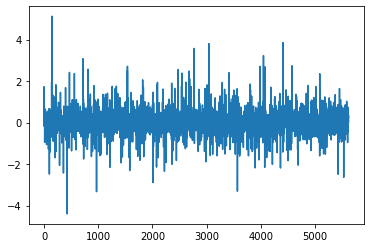

In [55]:
#weight vector and each word
%pylab inline
plt.plot(logreg_l2.coef_[0])
plt.show()

In [56]:
# Positive words with most importance
for i in range(len(logreg_l2.coef_[0])):
    if logreg_l2.coef_[0][i] >=2.5:
        print(unique_dict_words[int(i)])

great
works
interesting
liked
wonderful
excellent
nice
best
delici
fantastic
love
loved


In [57]:
# Negative words with most importance
for i in range(len(logreg_l1_l2.coef_[0])):
    if logreg_l1_l2.coef_[0][i] <=-2.5:
        print(unique_dict_words[int(i)])

bad
worst
didnt
poor
stupid


In [58]:
logreg_l1 = linear_model.LogisticRegressionCV(penalty='l1', solver = 'liblinear')
logreg_l1.fit(feature_normal_vector_training,Y_train)
score_regre_l1 = logreg_l1.fit(feature_normal_vector_training,Y_train).score(feature_normal_vector_testing,Y_test)
Y_pred_log_l1 = logreg_l1.predict(feature_normal_vector_testing)
cf_regre_l1 = confusion_matrix(Y_test, Y_pred_log)

c:\users\chi\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\chi\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [60]:
print("Accuracy using Logistic Regression")
print(score_regre_l1)
print("\n")

print("Confusion Matrix")
cf_regre_l1

Accuracy using Logistic Regression
0.7416666666666667


Confusion Matrix


array([[246,  54],
       [ 93, 207]], dtype=int64)

## (h) N-gram model

In [61]:
#Naive Bayes N-gram Model, n=2
n_gram_dict=[]

for sentence in X_train:
    words=sentence.split(" ")
    if " " in words:
        words.remove(" ")
    for i in range(len(words)-1):
        if words[i+1]!="":
            n_gram_dict.append(words[i]+" "+words[i+1])
            
unique_n_gram_dict = list(set(n_gram_dict)) #set() return the unique words

In [62]:
#n_gram_dict
print(len(n_gram_dict))
print(len(unique_n_gram_dict))

12457
11533


In [63]:
unique_n_gram_dict

['entertaining usual',
 'riz ortolani',
 'ordered appetizer',
 'folks wait',
 'day guess',
 'stars appet',
 'array memorable',
 'assistant bored',
 'films even',
 'definitely bargain',
 'modest priced',
 'alarm clock',
 'bad phone',
 'explanation atrocity',
 'sturdy waterproof',
 'great pictures',
 'landscapes great',
 'task incredible',
 'avoid next',
 'obviously comfortable',
 'pieces fit',
 'ignored went',
 'long piece',
 'letting us',
 'always olde',
 'recommend cas',
 'kanalys spiffy',
 'real killer',
 'net etc',
 'also works',
 'knew saw',
 'barely comprehensible',
 'take self',
 'time entire',
 'scenes welldone',
 'friendly helpful',
 'absolutely horrible',
 'got huevos',
 'appealing movies',
 'boiled shrimp',
 'could created',
 'sublimely moving',
 'always super',
 'take parents',
 'show gratitude',
 'delish incredible',
 'bubbling peeling',
 'chickenwith cranberrymmmm',
 'use upgrad',
 'cooking course',
 'palm replacementr',
 'care happened',
 'sidelined inexplicable',
 'phone

In [64]:
# Calculate feature vector for ngram

def calculate_feature_vector_n_gram(X):
    n_gram_feature_vector=[]
    for i in X:
        word_list=i.split(" ")
        new_word_list=[]
        for k in range(len(word_list)-1):
            new_word_list.append(word_list[k]+" "+word_list[k+1])
        feature_vector=[]
        for i in unique_n_gram_dict:
            feature_vector.append(new_word_list.count(i))
        n_gram_feature_vector.append(feature_vector)
    return n_gram_feature_vector

In [65]:
n_gram_feature_vector_training = calculate_feature_vector_n_gram(X_train)
n_gram_feature_vector_testing = calculate_feature_vector_n_gram(X_test)

# Convert to np array
np_n_gram_feature_training = np.array(n_gram_feature_vector_training)
np_n_gram_feature_testing = np.array(n_gram_feature_vector_testing)

# Normalizing the N gram feature vector
n_gram_feature_vector_training_normal = normalization(n_gram_feature_vector_training)
n_gram_feature_vector_testing_normal = normalization(n_gram_feature_vector_testing)

In [67]:
#print(shape(np_n_gram_feature_training))
print(np_n_gram_feature_training[0])
print(np_n_gram_feature_training[30])

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [68]:
words_in_positive_ngram = 0
for i in range (0, len(Y_train)):
    if Y_train[i] == '1':
        words_in_positive_ngram += sum(np_n_gram_feature_training[i])
        #print(sum(np_n_gram_feature_training[i]))
print(words_in_positive_ngram)

words_in_negative_ngram = 0
for i in range (0, len(Y_train)):
    if Y_train[i] == '0':
        #print('haha')
        words_in_negative_ngram += sum(np_n_gram_feature_training[i])
print(words_in_negative_ngram)

6295
6162


In [69]:
count_wordi_inpositive_ngram = {}
count_wordi_innegative_ngram = {}

for sentence in range(0, len(np_n_gram_feature_testing)):
    for word_i in range(0, len(np_n_gram_feature_testing[sentence])):
        if np_n_gram_feature_testing[sentence][word_i] != 0:
            #print(np_feature_test[sentence][word_i])
            count_wordi_inpositive_ngram[unique_n_gram_dict[word_i]]=sum(np_n_gram_feature_training[1201:2400,word_i])+1 #add-one (Laplace) smoothing
            
            
for sentence in range(0, len(np_n_gram_feature_testing)):
    for word_i in range(0, len(np_n_gram_feature_testing[sentence])):
        if np_n_gram_feature_testing[sentence][word_i] != 0:
            #print(np_feature_test[sentence][word_i])
            count_wordi_innegative_ngram[unique_n_gram_dict[word_i]]=sum(np_n_gram_feature_training[0:1200,word_i])+1 #add-one (Laplace) smoothing

In [70]:
print(len(count_wordi_inpositive_ngram))
print(len(count_wordi_innegative_ngram))

273
273


In [71]:
#Compute n-gram Naive Bayes score for each sentence in X_test
score_positive_ngram = []
score_negative_ngram = []

for sentence in range(0, len(np_n_gram_feature_testing)):
    counter = 0
    word_num_positive = 1
    word_num_negative = 1
    for word_i in range(0, len(np_n_gram_feature_testing[sentence])):
        if np_n_gram_feature_testing[sentence][word_i] != 0:
            counter += 1
            word = unique_n_gram_dict[word_i]
            #print(word)
            word_num_positive *= count_wordi_inpositive_ngram[word]
            word_num_negative *= count_wordi_innegative_ngram[word]
    score_positive_ngram.append(P_positive * ((word_num_positive) / len(count_wordi_inpositive_ngram)**counter))
    score_negative_ngram.append(P_negative * ((word_num_negative) / len(count_wordi_innegative_ngram)**counter))
    #print(word_num_negative)

In [72]:
len(score_negative_ngram)

600

In [73]:
Y_pre_bayes_ngram = []
for i in range(0, len(score_negative_ngram)):
    if score_negative_ngram[i] > score_positive_ngram[i]:
        Y_pre_bayes_ngram.append('0')
    else:
        Y_pre_bayes_ngram.append('1')
Y_pre_bayes_ngram = np.array(Y_pre_bayes_ngram)

In [74]:
#shape(Y_pre_bayes_ngram)
counter2 = 0
for i in range (0, len(Y_pre_bayes_ngram)):
    if Y_pre_bayes_ngram[i] == Y_test[i]:
        counter2+=1
accuracy_bayes_ngram =  counter2 / len(Y_pre_bayes_ngram)
cf_bayes_ngram = confusion_matrix(Y_test, Y_pre_bayes_ngram)

In [75]:
print('Confusion matrix for 2-gram Native Bayes is \n', cf_bayes_ngram)
print('Accuracy for 2-gram Native Bayes is ', accuracy_bayes_ngram)

Confusion matrix for 2-gram Native Bayes is 
 [[ 83 217]
 [ 24 276]]
Accuracy for 2-gram Native Bayes is  0.5983333333333334


## Logistic regressing for N-gram

In [90]:
# Logistic regressing for N-gram
logreg_ngram = linear_model.LogisticRegressionCV(penalty='l2', solver = 'liblinear')
logreg_ngram.fit(n_gram_feature_vector_training_normal,Y_train)
score_ngram_regre = logreg_ngram.fit(n_gram_feature_vector_training_normal,Y_train).score(n_gram_feature_vector_testing_normal,Y_test)

Y_ngram_regre_pred = logreg_ngram.predict(n_gram_feature_vector_testing_normal)
cf_ngram_regre = confusion_matrix(Y_test, Y_ngram_regre_pred)

Accuracy using Logistic Regression
0.6083333333333333

Confusin Matrix
[[271  29]
 [206  94]]
Populating the interactive namespace from numpy and matplotlib


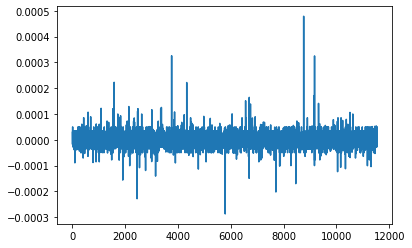

In [91]:
# Logistic regressing for N-gram
print("Accuracy using Logistic Regression")
print(score_ngram_regre)
print("")

print("Confusin Matrix")
print(cf_ngram_regre)

%pylab inline
plt.plot(logreg_ngram.coef_[0])

In [92]:
# Positive words with most importance
for i in range(len(logreg_ngram.coef_[0])):
    if logreg_ngram.coef_[0][i] >= 0.0002:
        print(unique_n_gram_dict[int(i)])

one best
highly recommend
great product
works great
great phon


In [93]:
# Negative words with most importance
for i in range(len(logreg_ngram.coef_[0])):
    if logreg_ngram.coef_[0][i] <=-0.0002:
        print(unique_n_gram_dict[int(i)])

waste money
dont waste
waste time


## Citation
https://medium.com/swlh/sentiment-analysis-of-online-reviews-ee2b461f7dec